In [5]:
# automatically reload edited source code
%load_ext autoreload
%autoreload 2

# external package imports
import numpy as np
import pandas as pd
import os, pdb, glob, time, argparse
from os.path import exists, split, isdir, getsize
from sdo_clv_pipeline.sdo_plot import *

# internal package imports
from sdo_clv_pipeline.paths import root
from sdo_clv_pipeline.sdo_io import *
from sdo_clv_pipeline.sdo_process import *
from sdo_clv_pipeline.sdo_io import * 
import sdo_clv_pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# returns four sorted lists with the path to each of the file types
data_dir = os.path.join(root, "data")
fits_dir = os.path.join(root, "data")
print(data_dir)
files = organize_IO(fits_dir, clobber=True, globexp="")
con_files, mag_files, dop_files, aia_files = files
# print(con_files)
# print(len(con_files))
# print(con_files)
# print(mag_files)
# print(dop_files)
# print(aia_files)

/Users/mpalumbo/work/savannah/sdo-clv-pipeline/data
File counts:
CON: 1
MAG: 1
DOP: 1
AIA: 1


/Users/mpalumbo/work/savannah/sdo-clv-pipeline/data
correct mag
correct dop
checking
set to nan
mask
About to construct SunMask
Entered SunMask.__init__


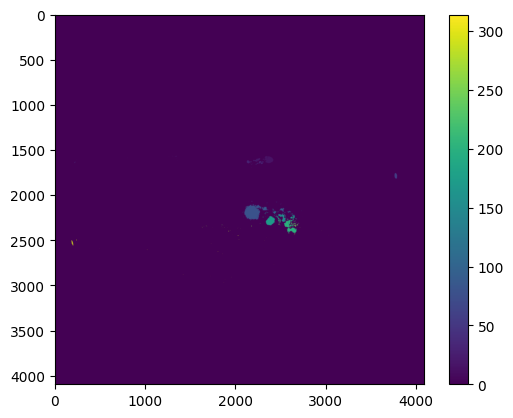

In [ ]:
moat_vels = []
moat_mags = []
moat_ints = []
moat_dilations = []
moat_areas = []
moat_thetas = []
moat_vals = []
counter = -1
moat_avg_vels = []
symbol = []
left_moats = []
right_moats = []

print(data_dir)

for i in range(len(con_files)):
    # define the paths where files live
    con_file = os.path.join(data_dir, con_files[i])
    mag_file = os.path.join(data_dir, mag_files[i])
    dop_file = os.path.join(data_dir, dop_files[i])
    aia_file = os.path.join(data_dir, aia_files[i])

    # # create the SDOImage object instances
    # con = SDOImage(con_file)     # continuum, Relative HMI continuum intensity
    # mag = SDOImage(mag_file)     # magnetogram, magnetic field strength
    # dop = SDOImage(dop_file)     # Dopplergram, LOS velocity
    # aia = SDOImage(aia_file)     # AIA 1700 continuum filtergram, Relative 1700 Angstrom Continuum Intensity

    process_data_set(con_file, mag_file, dop_file, aia_file,
                     moat_vels, moat_mags, moat_ints, moat_dilations,
                     moat_thetas, moat_areas, moat_vals, counter,
                     moat_avg_vels, symbol, left_moats, right_moats,
                     mu_thresh=0.1, n_rings=10, suffix=None, 
                     datadir=data_dir)

    # # do the coordinate transforms, etc.
    # dop.calc_geometry()
    # con.inherit_geometry(dop)
    # mag.inherit_geometry(dop)

    # aia.rescale_to_hmi(con) # reproject onto plate scale of HMI images

    # # calculate the limb darkening correction
    # con.calc_limb_darkening()
    # aia.calc_limb_darkening()

    # # correct magnetogram for foreshortening
    # mag.correct_magnetogram()

    # # calculate differential rot., meridional circ., obs. vel, grav. redshift, cbs
    # dop.correct_dopplergram(fit_cbs=False)

    # # set values to nan for mu less than mu_thresh
    # mu_thresh = 0.1
    # con.mask_low_mu(mu_thresh)
    # dop.mask_low_mu(mu_thresh)
    # mag.mask_low_mu(mu_thresh)
    # aia.mask_low_mu(mu_thresh)

    # counter += 1

    # mask = SunMask(con, mag, dop, aia, moat_vels, moat_mags, moat_ints, moat_dilations, moat_thetas, moat_areas, moat_vals, counter, moat_avg_vels, symbol)
    # mask.mask_low_mu(mu_thresh)

    # label_moats_on_sun(mask)

In [ ]:
#plot_mask(mask)
plt.imshow(mask.regions)


In [8]:
import sdo_clv_pipeline
print(sdo_clv_pipeline.__file__)
from sdo_clv_pipeline.paths import root
print(root)

/Users/mpalumbo/work/savannah/sdo-clv-pipeline/sdo_clv_pipeline/__init__.py
/Users/mpalumbo/work/savannah/sdo-clv-pipeline
